In [3]:
#import libraries and dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

match_data = pd.read_csv('matches.csv', delimiter = ',')

df = pd.DataFrame(match_data)

In [4]:
#examine dataframe head
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
#examine dataframe tail
df.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [6]:
#Examine dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.6+ KB


In [7]:
#create new dataframe with relevant columns
coin_toss_df = df[['toss_winner', 'winner']]
coin_toss_df = coin_toss_df.dropna(how='any',axis=0) 
coin_toss_df = coin_toss_df.astype(str)
coin_toss_df

,toss_winner,winner
0,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Rising Pune Supergiant,Rising Pune Supergiant
2,Kolkata Knight Riders,Kolkata Knight Riders
3,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Royal Challengers Bangalore
...,...,...
631,Royal Challengers Bangalore,Royal Challengers Bangalore
632,Royal Challengers Bangalore,Royal Challengers Bangalore
633,Kolkata Knight Riders,Sunrisers Hyderabad
634,Sunrisers Hyderabad,Sunrisers Hyderabad


In [8]:
coin_toss_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 635
Data columns (total 2 columns):
toss_winner    633 non-null object
winner         633 non-null object
dtypes: object(2)
memory usage: 14.8+ KB


In [9]:
#check if there are any spelling variations of team names in toss_winner column
coin_toss_df.toss_winner.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [10]:
#replace "Rising Pune Supergiants" with "Rising Pune Supergiant" in winner column
coin_toss_df.toss_winner.replace('Rising Pune Supergiants', 'Rising Pune Supergiant', inplace=True)
coin_toss_df.toss_winner.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [11]:
#check if there are any spelling variations of team names in winner column
coin_toss_df.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants'], dtype=object)

In [12]:
#replace "Rising Pune Supergiants" with "Rising Pune Supergiant" in winner column
coin_toss_df.winner.replace('Rising Pune Supergiants', 'Rising Pune Supergiant', inplace=True)
coin_toss_df.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala'], dtype=object)

In [13]:
#create a counter to calculate percentage that toss winner is actual winner and percentage that toss winner is actual loser
winner_counter = 0
loser_counter = 0
for a, b in zip(coin_toss_df.toss_winner, coin_toss_df.winner):
    if a == b:
        winner_counter = winner_counter + 1
    else: 
        loser_counter = loser_counter + 1

toss_win_actual_win_percent = (winner_counter/len(coin_toss_df)*100)
toss_win_actual_lose_percent = (loser_counter/len(coin_toss_df)*100)

print('The winner of the coin toss wins the match ' + str(toss_win_actual_win_percent) + '% of the time.')
print('The winner of the coin toss loses the match ' + str(toss_win_actual_lose_percent) + '% of the time.')


The winner of the coin toss wins the match 51.342812006319114% of the time.
The winner of the coin toss loses the match 48.657187993680886% of the time.


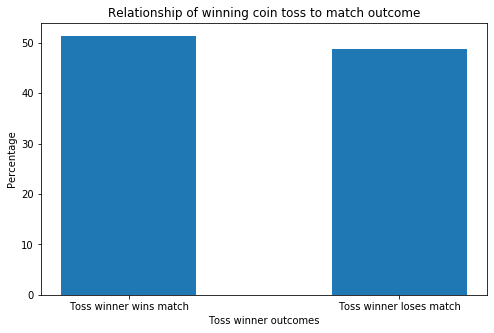

In [14]:
#bar graph of win/loss split of toss winners

toss_outcomes = ('Toss winner wins match', 'Toss winner loses match')
toss_win_loss_split = [toss_win_actual_win_percent, toss_win_actual_lose_percent]

plt.figure(figsize=(8,5))
plt.bar(toss_outcomes, toss_win_loss_split, width = 0.5)
plt.title('Relationship of winning coin toss to match outcome')
plt.xlabel('Toss winner outcomes')
plt.ylabel('Percentage')
plt.show()